<!-- Cabeçalho -->
<br />
<p align="center">

  <h1 align="center">Análise Explorátoria</h1>
  
</p>

- Autor: Lucas Dias Noronha
- Ano: 2025
- Objetivo: Objetivo: Explorar e analisar os dados limpos, identificar padrões, distribuições, gerar insights iniciais e visualizações que fundamentem decisões.

## Introdução

Esta análise explora dados sobre a população indígena no Brasil entre 2010 e 2022, com foco em:

- Comparação do crescimento populacional
- Evolução da distribuição urbano vs rural
- Distribuição dentro vs fora de Terras Indígenas (TIs)
- Variações percentuais na composição urbana e rural entre as duas datas

Os dados foram limpos para remover entradas inválidas e organizar por localidade (Brasil, Regiões, Estados).

### Carregando Dependências

Configurando o ambiente para análise de dados com as principais bibliotecas da stack:

- **Pandas** – manipulação e análise de dados tabulares  
- **NumPy** – suporte a operações numéricas e vetoriais de alto desempenho  
- **Matplotlib** – criação de visualizações e gráficos personalizados


In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))  # sobe um nível e adiciona ao path

from src.visualization.bar import PlotBar
import pandas as pd

### Carregando Base de Dados


In [2]:
db_pais = pd.read_csv("../data/processed/db_pais.csv")
db_regioes = pd.read_csv("../data/processed/db_regioes.csv")
db_estados = pd.read_csv("../data/processed/db_estados.csv")  

grafico = PlotBar(db_pais)

# Análise do Crescimento da População Indígena no Brasil (2010-2022)

## Comparativo nacional em valores absolutos

No trecho de código abaixo, realizamos cálculos fundamentais para compreender a evolução da população indígena no Brasil entre 2010 e 2022.

- **Diferença Absoluta**

$$
\text{Diferença Absoluta} = V_f - V_i
$$


- **Crescimento Percentual**

$$
C\% = \frac{V_f - V_i}{V_i} \times 100
$$

## Comparativo absoluto Crescimento População Indígena em Nível Nacional 

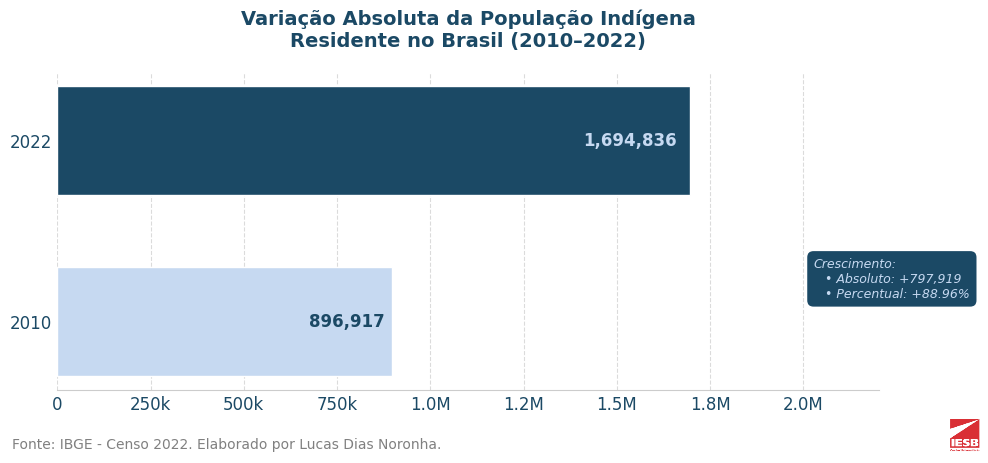

In [3]:
grafico.plot_crescimento_pais()

#### O quão grande ou significativo foi esse salto, comparado ao ponto de partida?

Vemos que o crescimento percentual dessa população foi de 88.96%, quase o dobro da população inicial nesses 12 anos. Um salto dessa magnitude sinaliza que algo profundo está acontecendo. No caso do Censo 2022, os analistas apontam que isso se deve a uma combinação de fatores:

Melhora na Coleta: O IBGE aperfeiçoou a forma de perguntar e recensear em territórios indígenas.

Aumento da Autodeclaração: Mais pessoas que vivem fora de terras indígenas (em cidades, por exemplo) passaram a se reconhecer e a se autodeclarar como indígenas, um fenômeno de valorização da identidade.

Crescimento Demográfico: Taxas de natalidade reais.

#### As pessoas se identificam mais como indígena?
Observa-se que, ao longo do período de 12 anos, houve um crescimento absoluto de aproximadamente [798.000] indivíduos na população indígena do Brasil. Este aumento pode refletir tanto a expansão demográfica quanto um maior número de pessoas que passaram a se identificar como indígenas.

Historicamente, muitos indivíduos de origem indígena ocultavam sua ancestralidade devido ao preconceito estrutural presente na sociedade, que frequentemente desvalorizava ou estigmatizava essas identidades. O crescimento registrado pode, portanto, também ser resultado de políticas públicas voltadas à valorização e visibilidade dos povos indígenas, bem como de iniciativas promovidas por movimentos sociais e organizações da sociedade civil, que reforçaram o reconhecimento de direitos e estimularam o resgate do orgulho cultural entre aqueles que anteriormente se sentiam compelidos a ocultar sua origem.

Dessa forma, os dados refletem não apenas mudanças demográficas, mas também transformações sociais e culturais que influenciam a forma como os indivíduos se identificam etnicamente.

Além dos fatores étnicos, podemos entender que o aumento desta parcela da população gera um aumento na necessidade de serviços e recursos básicos como saúde, educação, infraestrutura, mostrando o tamanho do desafio.


## Panorama Nacional por Situação de Domicílio (Urbana e Rural)

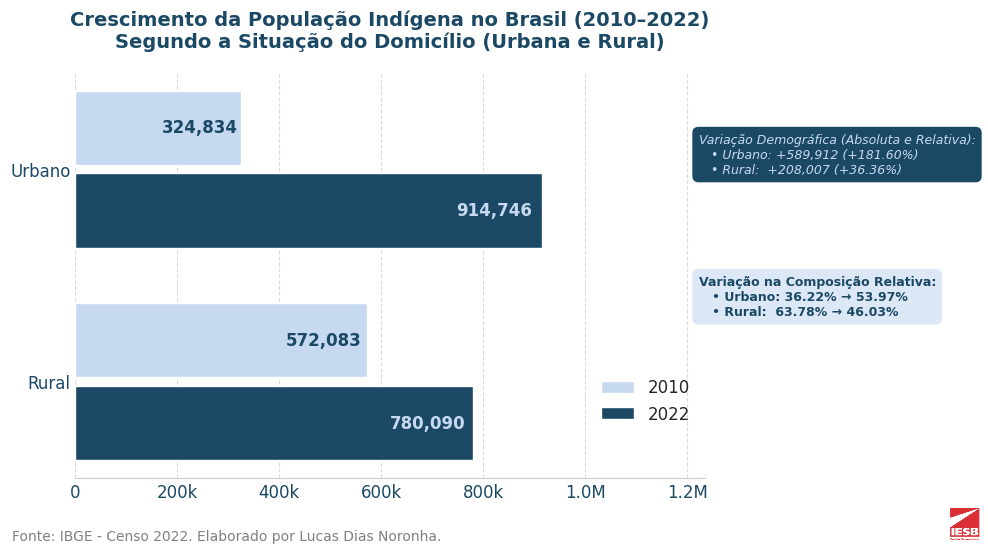

In [4]:
grafico.plot_crescimento_area()

#### Quão grande foi o aumento de indigenas vivendo em áreas urbanas? Por que houve esse aumento?

Entre 2010 e 2022, o número de indígenas vivendo em áreas urbanas quase triplicou, apresentando um aumento de 181,60%, equivalente a 589.912 pessoas. Tal crescimento evidencia um intenso processo de migração dos povos indígenas para os centros urbanos, mas não pode ser explicado apenas pelo movimento populacional. Fatores culturais e sociais desempenham papel determinante nesse fenômeno.

O aumento reflete, em grande medida, a valorização da identidade étnica: muitos indígenas que anteriormente não se autodeclaravam passaram a fazê-lo, impulsionados tanto pela melhoria na coleta de dados do IBGE quanto pelo fortalecimento da consciência cultural e étnica. Ademais, o crescimento urbano evidencia uma maior integração dos indígenas à sociedade, buscando melhores condições de educação, saúde, lazer, segurança e infraestrutura.

Políticas públicas voltadas à população indígena, aliadas a uma maior visibilidade de sua cultura, contribuíram para esse cenário. O aumento é, portanto, menos um reflexo de nascimento natural ou migração direta das aldeias para as cidades e mais um fenômeno de autodeclaração e retomada de identidade. Essa tendência desconstrói a ideia de que "indígenas vivem apenas em aldeias", mostrando que há uma população urbana significativa que se reconecta com suas raízes e reivindica sua identidade. Dos 796 mil indígenas que surgiram estatisticamente entre os dois censos, aproximadamente 590 mil residem em áreas urbanas — ou seja, três em cada quatro.

### O que evidencia o aumento de indigenas em áreas rurais? 

Durante esses 12 anos, houve um aumento de 208,007 pessoas, um aumento de 36.36%. Um crescimento de 36,36% em 12 anos é muito robusto. Ele provavelmente reflete uma combinação. O aumento de indigenas em áreas rurais nos mostra não apenas uma aumento da população, mas um possível aumento da natalidade, um maior acesso a programas do governo, proteção de suas terras, acesso a saúde, educação, segurança. Muitos indigenas, mesmo vivendo em áreas rurais, vão a cidade frequentemente em busca desses serviços. O IBGE melhorou sua capacidade de recensear áreas de difícil acesso. Pessoas em áreas rurais (mas fora de terras demarcadas) também podem estar se declarando mais. Mesmo com todo o crescimento urbano, a população rural (que inclui as Terras Indígenas demarcadas) continua crescendo fortemente, mostrando a vitalidade demográfica dessas comunidades.

### O que isso gera?

O aumento expressivo da população indígena, sobretudo em áreas urbanas, evidencia a necessidade de políticas públicas que considerem suas especificidades culturais, sociais e econômicas. Torna-se imperativo fortalecer programas de saúde, educação, moradia e proteção cultural, tanto nas cidades quanto nas áreas rurais, assegurando que os direitos dessa população sejam plenamente atendidos.

O fenômeno observado aponta, sobretudo, para uma retomada identitária urbana: o "boom" indígena no Brasil não se limita à expansão numérica, mas reflete uma reconexão das populações indígenas com suas origens e a afirmação de sua identidade nas cidades.


## Comparativo Nacional absoluto vivendo dentro e fora de terras indigenas

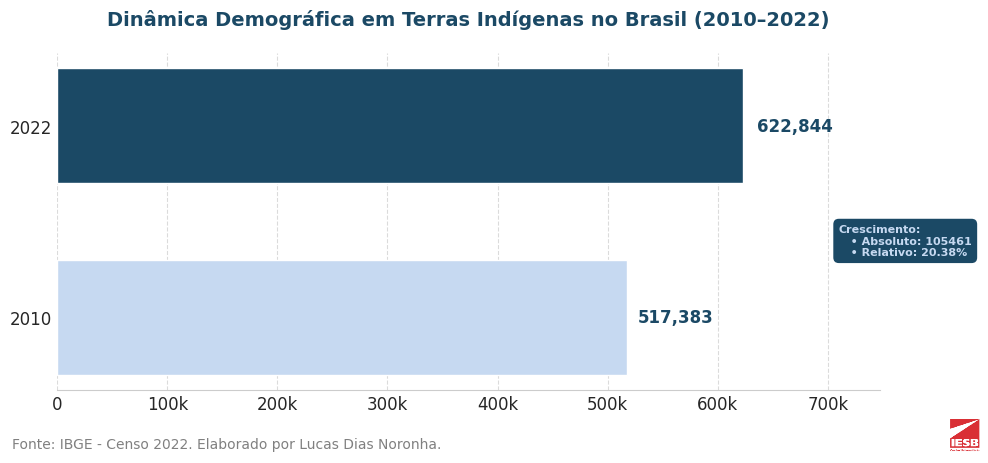

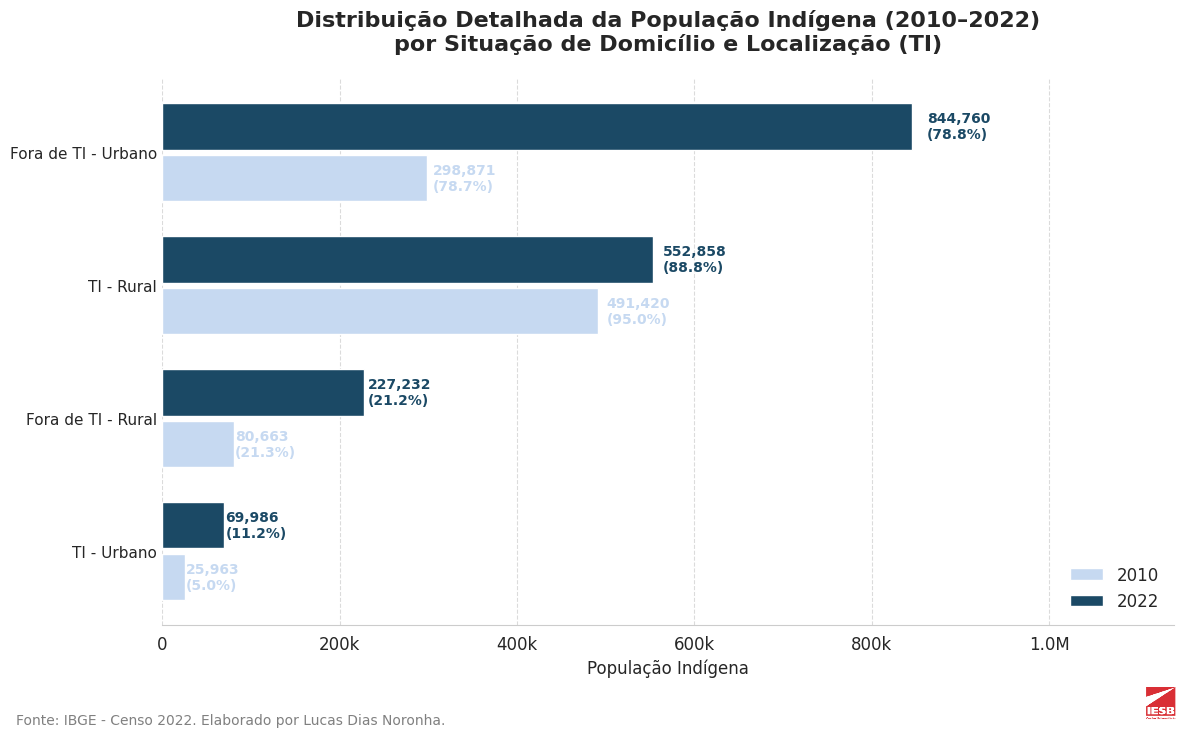

In [5]:
grafico.plot_crescimento_ti()
grafico.plot_distribuicao_detalhada()

### Análise dos Resultados:



In [6]:
db_pais.columns

Index(['Localidade', 'Indígenas 2010 Total', 'Indígenas 2010 Urbano',
       'Indígenas 2010 Rural', 'Indígenas 2010 TI Total',
       'Indígenas 2010 TI Urbano', 'Indígenas 2010 TI Rural',
       'Indígenas 2010 Fora TI Total', 'Indígenas 2010 Fora TI Urbano',
       'Indígenas 2010 Fora TI Rural', 'Indígenas 2022 Total',
       'Indígenas 2022 Urbano', 'Indígenas 2022 Rural',
       'Indígenas 2022 TI Total', 'Indígenas 2022 TI Urbano',
       'Indígenas 2022 TI Rural', 'Indígenas 2022 Fora TI Total',
       'Indígenas 2022 Fora TI Urbano', 'Indígenas 2022 Fora TI Rural',
       '% Indígenas 2010 Urbano', '% Indígenas 2010 Rural',
       '% Indígenas 2010 TI Urbano', '% Indígenas 2010 TI Rural',
       '% Indígenas 2010 Fora TI Urbano', '% Indígenas 2010 Fora TI Rural',
       '% Indígenas 2022 Urbano', '% Indígenas 2022 Rural',
       '% Indígenas 2022 TI Urbano', '% Indígenas 2022 TI Rural',
       '% Indígenas 2022 Fora TI Urbano', '% Indígenas 2022 Fora TI Rural'],
      dtype='o

In [ ]:
grafico.plot_comparativo_detalhado()

AttributeError: 'PlotBar' object has no attribute 'plot_comparativo_detalhado'